# Data Analysis - Introduction to Pandas DataFrames

**Author**: [Gabriele Pompa](https://www.linkedin.com/in/gabrielepompa/): gabriele.pompa@unisi.com

# Table of contents

**TODO**

### **Resources**: 

- [_Python for Finance (2nd ed.)_](http://shop.oreilly.com/product/0636920117728.do): Sec. 5.The DataFrame Class, 5.Basic Analytics, 5.Basic Visualization, 5.The Series Class, 5.Complex Selection, 5.Concatenation, Joining, and Merging, 5.Performance Aspects.


- _[Pandas - Intro to data structures](https://pandas.pydata.org/docs/getting_started/dsintro.html#intro-to-data-structures)_ ([Series](https://pandas.pydata.org/docs/getting_started/dsintro.html#series); [DataFrame](https://pandas.pydata.org/docs/getting_started/dsintro.html#dataframe)). From _[Pandas - Getting started tutorials](https://pandas.pydata.org/docs/getting_started/intro_tutorials/index.html):_ 
    - [What kind of data does pandas handle?](https://pandas.pydata.org/docs/getting_started/intro_tutorials/01_table_oriented.html), 
    - _[How do I select a subset of a `DataFrame`?](https://pandas.pydata.org/docs/getting_started/intro_tutorials/03_subset_data.html),_ 
    - _[How to create plots in pandas?](https://pandas.pydata.org/docs/getting_started/intro_tutorials/04_plotting.html),_ _[How to create new columns derived from existing columns](https://pandas.pydata.org/docs/getting_started/intro_tutorials/05_add_columns.html),_ 
    - _[How to calculate summary statistics?](https://pandas.pydata.org/docs/getting_started/intro_tutorials/06_calculate_statistics.html),_ 
    - _[How to combine data from multiple tables?](https://pandas.pydata.org/docs/getting_started/intro_tutorials/08_combine_dataframes.html)_

# Executive Summary <a name="summary"></a>

**TODO**

In [1]:
# for NumPy arrays
import numpy as np

# for Pandas Series and DataFrame
import pandas as pd

# for Matplotlib plotting
import matplotlib.pyplot as plt
%matplotlib inline

# 1. Introduction to Pandas DataFrames <a name="DataFrame"></a>

A [Pands DataFrame](https://pandas.pydata.org/docs/getting_started/dsintro.html#dataframe) is a 2-dimensional labeled data structure with columns of potentially different types (integers, strings, floating point numbers, etc.).

You can think of it like an Excel  spreadsheet, or - knowing Pandas Series - a dict of Series objects.

# 2. Creation <a name="df_creation"></a>

DataFrames can be created using the constructor:

`
pd.DataFrame(data[, index, columns])
`

where:
- `data`: is the data content of the DataFrame. It can be a NumPy N-dim array, a Python dict of:
    - Pandas Series,
    - 1-dim NumPy arrays, 
    - Python Lists,
    - etc...
    
- `index`: (optional) is the index of the DataFrame. It can be an array-like structure (e.g. a list). If not provided, default index spans the rows of `data`. For example, if `data` is a NumPy `(n,m)` array, it is `[0,1,...,n-1]`.

- `columns`: (optional) lists the columns of the DataFrame. It can be an array-like strucutre (e.g. a list). If not provided, default columns spans the columns of `data`. For example, if `data` is a NumPy `(n,m)` array, it is `[0,1,...,m-1]`.

Here we consider the creation of a Pandas DataFrame from a 2-dimensional NumPy array (that is, a matrix). We refer to [Intro to data structures - DataFrame](https://pandas.pydata.org/docs/getting_started/dsintro.html#dataframe) for other creational paradigms and full details.

So, let's define a $10 \times 5$ matrix with columns the number from 1 to 10 raised to powers 1, 2, 3, 4, 5

In [2]:
mat = np.array([[i**k for i in range(1,11)] for k in range(1,6)]).T
mat

array([[     1,      1,      1,      1,      1],
       [     2,      4,      8,     16,     32],
       [     3,      9,     27,     81,    243],
       [     4,     16,     64,    256,   1024],
       [     5,     25,    125,    625,   3125],
       [     6,     36,    216,   1296,   7776],
       [     7,     49,    343,   2401,  16807],
       [     8,     64,    512,   4096,  32768],
       [     9,     81,    729,   6561,  59049],
       [    10,    100,   1000,  10000, 100000]])

we pass the matrix `mat` as the `data` parameter of `pd.DataFrame()`

In [3]:
df = pd.DataFrame(mat)
df

,0,1,2,3,4
0,1,1,1,1,1
1,2,4,8,16,32
2,3,9,27,81,243
3,4,16,64,256,1024
4,5,25,125,625,3125
5,6,36,216,1296,7776
6,7,49,343,2401,16807
7,8,64,512,4096,32768
8,9,81,729,6561,59049
9,10,100,1000,10000,100000


In [4]:
mat.shape

(10, 5)

The function `pd.DataFrame()` returns a Pandas DataFrame object. Each element in the table is linked to its corresponding index and column. 

Notice that:
- the `index` which is generated by default (since we didn't provide one explicitly) is `0, 1,..., 9 = mat.shape[0]-1`;
- the `columns` which are generated by default (since we didn't provide them explicitly) are `0, 1,..., 4 = mat.shape[1]-1`;

In [5]:
type(df)

pandas.core.frame.DataFrame

Notice that the explicit assignment `data=mat` is optional and equivalent to `pd.DataFrame(mat)`.

Similarly to NumPy arrays and Pandas Series, Pandas DataFrames have meta-informative attributes too. Let's have a look at some of them.

The number of elements is given by

In [6]:
df.size

50

The number of rows and columns of the DataFrame is, similarly to NumPy arrays:

In [7]:
df.shape

(10, 5)

Each column of the DataFrame may have different data-type, use `.dtypes` attribute to retrieve them (mind the plural)

In [8]:
df.dtypes

0    int32
1    int32
2    int32
3    int32
4    int32
dtype: object

Notice that a `pd.Series` is returned with each column's data-type reported as a `str` (`object` is the Pandas for `str` data-type) and linked to an index labelled as the corresponding column label in the DataFrame (another example later).

Similarly, to Series, you can directly access the index sequence:

In [9]:
df.index

RangeIndex(start=0, stop=10, step=1)

As we have seen for Series, `RangeIndex` is the kind of `[0,1,...,mat.shape[0]-1]` index which Pandas creates by default when you don't input one explicitly.

In [10]:
df.columns

RangeIndex(start=0, stop=5, step=1)

Similarly, a `[0,1,...,mat.shape[1]-1]` `RangeIndex` is created to label the columns when you don't provide them explicitly.

Of course we can give more descriptive names to the columns of our DataFrame:

In [11]:
df.columns = ['x', 'x^2', 'x^3', 'x^4', 'x^5']
df

,x,x^2,x^3,x^4,x^5
0,1,1,1,1,1
1,2,4,8,16,32
2,3,9,27,81,243
3,4,16,64,256,1024
4,5,25,125,625,3125
5,6,36,216,1296,7776
6,7,49,343,2401,16807
7,8,64,512,4096,32768
8,9,81,729,6561,59049
9,10,100,1000,10000,100000


In [12]:
df.columns

Index(['x', 'x^2', 'x^3', 'x^4', 'x^5'], dtype='object')

Now the columns that we define are a general `Index` of strings (`dtype='object'`).

As for Pandas Series, ff you want just the values (without the indexing) - that is, the original NumPy `mat` in our case - these can be accessed through the `.values` attribute

In [13]:
df.values

array([[     1,      1,      1,      1,      1],
       [     2,      4,      8,     16,     32],
       [     3,      9,     27,     81,    243],
       [     4,     16,     64,    256,   1024],
       [     5,     25,    125,    625,   3125],
       [     6,     36,    216,   1296,   7776],
       [     7,     49,    343,   2401,  16807],
       [     8,     64,    512,   4096,  32768],
       [     9,     81,    729,   6561,  59049],
       [    10,    100,   1000,  10000, 100000]])

## 2.1. Time indexes: `pd.date_range()` and `pd.to_datetime()`  <a name="df_creation"></a>

In exactly the same way we were able to define time-indexes for Pandas Series, we can do it for Pandas DataFrames.

Here we create a range of business days (denoted by the _frequency_ `freq='B'`) starting from Jan 1st 2020. The range lasts a number of `periods` equal to the rows of our DataFrame (`df.shape[0]` which would of course be the same as `mat.shape[0]`)

In [14]:
dates = pd.date_range('2020-01-01', periods=df.shape[0], freq='B') 
dates

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-06',
               '2020-01-07', '2020-01-08', '2020-01-09', '2020-01-10',
               '2020-01-13', '2020-01-14'],
              dtype='datetime64[ns]', freq='B')

The kind of time-index that is returned is a `DatetimeIndex`. We can re-index our DataFrame with this new index.

In [15]:
df.index = dates
df

,x,x^2,x^3,x^4,x^5
2020-01-01,1,1,1,1,1
2020-01-02,2,4,8,16,32
2020-01-03,3,9,27,81,243
2020-01-06,4,16,64,256,1024
2020-01-07,5,25,125,625,3125
2020-01-08,6,36,216,1296,7776
2020-01-09,7,49,343,2401,16807
2020-01-10,8,64,512,4096,32768
2020-01-13,9,81,729,6561,59049
2020-01-14,10,100,1000,10000,100000


In [16]:
df.index

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-06',
               '2020-01-07', '2020-01-08', '2020-01-09', '2020-01-10',
               '2020-01-13', '2020-01-14'],
              dtype='datetime64[ns]', freq='B')

Of course, we could have defined the DataFrame with our desired `data`, `index` and `columns` setup.

In [17]:
df = pd.DataFrame(data=mat, 
                  index=dates, 
                  columns=['x', 'x^2', 'x^3', 'x^4', 'x^5'])
df

,x,x^2,x^3,x^4,x^5
2020-01-01,1,1,1,1,1
2020-01-02,2,4,8,16,32
2020-01-03,3,9,27,81,243
2020-01-06,4,16,64,256,1024
2020-01-07,5,25,125,625,3125
2020-01-08,6,36,216,1296,7776
2020-01-09,7,49,343,2401,16807
2020-01-10,8,64,512,4096,32768
2020-01-13,9,81,729,6561,59049
2020-01-14,10,100,1000,10000,100000


Function `pd.to_datetime()` has already been introduced in dedicated [Data Analysis - Introduction to Pandas Series](https://github.com/gabrielepompa88/IT-For-Business-And-Finance-2019-20/blob/master/Notebooks/Data_Analysis___Introduction_to_Pandas_Series.ipynb) notebook as a converter from a list of dates strings to a `DatetimeIndex` object.

In [18]:
pd.to_datetime(['2020-01-02', '2020-01-07', '2020-01-10'])

DatetimeIndex(['2020-01-02', '2020-01-07', '2020-01-10'], dtype='datetime64[ns]', freq=None)

As well as for Pandas Series, this function allows to filter rows of a DataFrame according to a list of strings representing dates. We'll see it shortly.

# 3. Basic plotting: `df.plot()` and `df.plot.bar()`  <a name="df_plot"></a>

As with Pandas Series, plotting a DataFrame cannot be easier

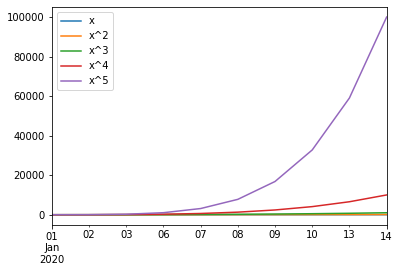

In [19]:
df.plot()

Notice that each columns, as reported in the picture legend, is translated into a line of different color, wherheas the common index is used on the x-axis to draw syncronized values.

Ok, given that our data are power functions, which grow at different speeds, it's difficult to appreciate all them together in the same plot... if we plot them straight-away. Let's plot their logs!

So let's define a new DataFrame `df_log` which has the same index and columns of the original `df`, but each element get's transformed throug a $\ln()$ function. 

We anticipate here the flexibility of NumPy's universal functions, which most can be used with `pandas.DataFrame` parameters in input (instead of `numpy.ndarray`).

_En passant,_ we re-label the columns of the `df_log` too. Notice the use of list comprehension together with the `+` operator to concatenate `str`.

In [20]:
df_log = np.log(df)
df_log.columns = ['log(' + c + ')' for c in df.columns]
df_log

,log(x),log(x^2),log(x^3),log(x^4),log(x^5)
2020-01-01,0.000000,0.000000,0.000000,0.000000,0.000000
2020-01-02,0.693147,1.386294,2.079442,2.772589,3.465736
2020-01-03,1.098612,2.197225,3.295837,4.394449,5.493061
2020-01-06,1.386294,2.772589,4.158883,5.545177,6.931472
2020-01-07,1.609438,3.218876,4.828314,6.437752,8.047190
2020-01-08,1.791759,3.583519,5.375278,7.167038,8.958797
2020-01-09,1.945910,3.891820,5.837730,7.783641,9.729551
2020-01-10,2.079442,4.158883,6.238325,8.317766,10.397208
2020-01-13,2.197225,4.394449,6.591674,8.788898,10.986123
2020-01-14,2.302585,4.605170,6.907755,9.210340,11.512925


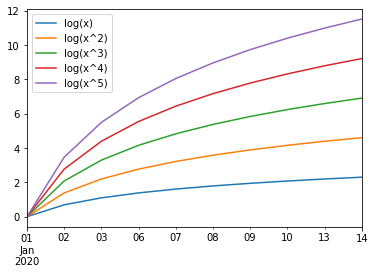

In [21]:
df_log.plot()

Now everything looks much clearer. As we did for Pandas Series, of course we can produce bar-plots (as well as the tons of [visualization styles](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html) which are available in Pandas

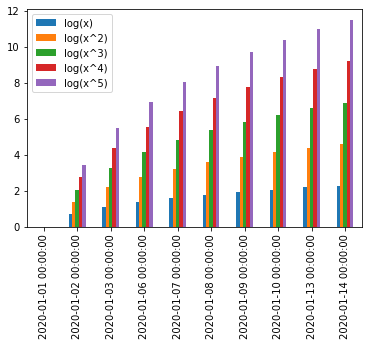

In [22]:
df_log.plot.bar()

# 4. Indexing and Slicing <a name="df_selection"></a>

In this section we describe the different possibilities that you have to access elements of a DataFrame `df`. You can:

- Select columns using the `[]` access operator;
- Filter rows according to a logical condition using the `[]` access operator;
- Select specific rows and columns using column names using `.loc[]` access operator;
- Select specific rows and columns using numerical positional indexes in the table using `.iloc[]` access operator.

We consider each case in a separate section with examples using our DataFrame of power functions.

In [23]:
df

,x,x^2,x^3,x^4,x^5
2020-01-01,1,1,1,1,1
2020-01-02,2,4,8,16,32
2020-01-03,3,9,27,81,243
2020-01-06,4,16,64,256,1024
2020-01-07,5,25,125,625,3125
2020-01-08,6,36,216,1296,7776
2020-01-09,7,49,343,2401,16807
2020-01-10,8,64,512,4096,32768
2020-01-13,9,81,729,6561,59049
2020-01-14,10,100,1000,10000,100000


## 4.1. Selecting columns: `[]` <a name="df_selection_cols"></a>

In this section we describe how you can select entire columns of a DataFrame. You can use the `[]` access operator. Here is an overview: 

&nbsp;  | syntax | example
:---: | :---: | :---:
select 1 column  | `df[colName]` | `s['x^2']`  
select  $\geq 2$ columns  | `df[[listOfCols]]` | `df[['x^2', 'x^3', 'x^5']]`



We can select a column using the column name inside the `[]` access operator, as if the DataFrame was a dict of the column-Series with column names its keys

In [24]:
s_x2 = df['x^2']
s_x2

2020-01-01      1
2020-01-02      4
2020-01-03      9
2020-01-06     16
2020-01-07     25
2020-01-08     36
2020-01-09     49
2020-01-10     64
2020-01-13     81
2020-01-14    100
Freq: B, Name: x^2, dtype: int32

Notice that - having selected just one column - a Pandas Series is returned

In [25]:
type(s_x2)

pandas.core.series.Series

If you want to select more than one column, just wrap their names in a list

In [26]:
df_x235 = df[['x^2', 'x^3', 'x^5']]
df_x235

,x^2,x^3,x^5
2020-01-01,1,1,1
2020-01-02,4,8,32
2020-01-03,9,27,243
2020-01-06,16,64,1024
2020-01-07,25,125,3125
2020-01-08,36,216,7776
2020-01-09,49,343,16807
2020-01-10,64,512,32768
2020-01-13,81,729,59049
2020-01-14,100,1000,100000


and notice that a new DataFrame is returned

In [27]:
type(df_x235)

pandas.core.frame.DataFrame

## 4.2. Conditional Selection: filtering rows <a name="df_conditional_selection"></a>

In this section we describe how you can filter specific rows according to a logical condition. You can input a logical condition `logicalCondition` to the `[]` access operator, like `df[logicalCondition]`. Here is an overview:

examples | meaning
 :---: |  :---: 
  `df[df['x^2'] > 5]` | all rows s.t. values in 'x^2' col are > 5
  `df[df['x^2'] <= df['x']]` | all rows s.t. values on 'x^2' col are <= than values in 'x' col
  `df[df['rating'].isin(['AAA', 'AA', 'A'])]` | all rows s.t. values in 'rating' col are in the list ['AAA', 'AA', 'A'] 


In [33]:
df

,x,x^2,x^3,x^4,x^5
2020-01-01,1,1,1,1,1
2020-01-02,2,4,8,16,32
2020-01-03,3,9,27,81,243
2020-01-06,4,16,64,256,1024
2020-01-07,5,25,125,625,3125
2020-01-08,6,36,216,1296,7776
2020-01-09,7,49,343,2401,16807
2020-01-10,8,64,512,4096,32768
2020-01-13,9,81,729,6561,59049
2020-01-14,10,100,1000,10000,100000


Suppose that you want to filter the rows for which column `x^2` is greater than a given threshold, say 17. The logical condition to achieve this is

In [36]:
df['x^2'] > 17

2020-01-01    False
2020-01-02    False
2020-01-03    False
2020-01-06    False
2020-01-07     True
2020-01-08     True
2020-01-09     True
2020-01-10     True
2020-01-13     True
2020-01-14     True
Freq: B, Name: x^2, dtype: bool

Notice that what is returned is a Pandas Series that is named after column `x^2` and that has `True`/`False` boolean values according to whether the condition is satisfied or not.

You can use this Series of boolean values to actually filter rows of the original DataFrame

In [37]:
df[df['x^2'] > 17]

,x,x^2,x^3,x^4,x^5
2020-01-07,5,25,125,625,3125
2020-01-08,6,36,216,1296,7776
2020-01-09,7,49,343,2401,16807
2020-01-10,8,64,512,4096,32768
2020-01-13,9,81,729,6561,59049
2020-01-14,10,100,1000,10000,100000


Notice that the output is the original DataFrame (all columns) with only the rows for that the Series `df['x^2'] > 17` has `True` value. That is to say, only those rows for which the conditon $x^2 > 17$ is satisfied.

The logical condition might involve other rows too. For example, let's define a new DataFrame with power-like columns of decimal number $d \in [0,2]$ range

In [44]:
mat_decimal = np.array([[i**k for i in np.linspace(0,2,10)] for k in range(1,6)]).T

In [51]:
x_axis = [i for i in np.linspace(0,2,10)]

In [45]:
df_decimal = pd.DataFrame(data = mat_decimal,
                          index = x_axis,
                          columns = df.columns)

df_decimal

,x,x^2,x^3,x^4,x^5
0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
0.222222,0.222222,0.049383,0.010974,0.002439,0.000542
0.444444,0.444444,0.197531,0.087791,0.039018,0.017342
0.666667,0.666667,0.444444,0.296296,0.197531,0.131687
0.888889,0.888889,0.790123,0.702332,0.624295,0.554929
1.111111,1.111111,1.234568,1.371742,1.524158,1.693509
1.333333,1.333333,1.777778,2.370370,3.160494,4.213992
1.555556,1.555556,2.419753,3.764060,5.855205,9.108097
1.777778,1.777778,3.160494,5.618656,9.988721,17.757727
2.000000,2.000000,4.000000,8.000000,16.000000,32.000000


Notice that to index the DataFrame we use a standard grid of the $[0,2]$ segment on the x-axis, made of 10 linearly spaced points. Of course, it coincides with column `x`, as the latter represents the identity function $f(x)=x$.

Let's focus on the first two columns `x` and `x^2` and let's see for which values of the x-axis the $x^2 \leq x$. A plot might helps here: 

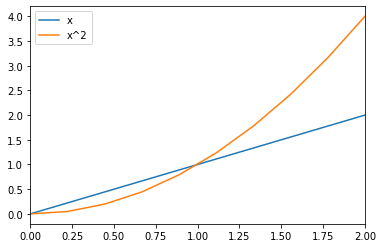

In [46]:
df_decimal[['x', 'x^2']].plot()

Do you see it? The touching point $x = x^2$ is at $x=1$. For $x<1$, $x^2 < x$. Let's filter rows according to this condition

In [49]:
df_decimal['x^2'] <= df_decimal['x']

0.000000     True
0.222222     True
0.444444     True
0.666667     True
0.888889     True
1.111111    False
1.333333    False
1.555556    False
1.777778    False
2.000000    False
dtype: bool

again, we can use this Series of booleans to filter rows of `df_decimal`

In [50]:
df_decimal[df_decimal['x^2'] <= df_decimal['x']]

,x,x^2,x^3,x^4,x^5
0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
0.222222,0.222222,0.049383,0.010974,0.002439,0.000542
0.444444,0.444444,0.197531,0.087791,0.039018,0.017342
0.666667,0.666667,0.444444,0.296296,0.197531,0.131687
0.888889,0.888889,0.790123,0.702332,0.624295,0.554929


which, as expected, returns only rows for which the `x_axis` index is at most 1.

Finally, you may want to filter rows according to values in a list. Suppose we have a dummy list of credit ratings

In [82]:
goodRatings = ['AAA', 'AA', 'A']

and a DataFrame of credit ratings and corresponding spreads (in [bps](https://en.wikipedia.org/wiki/Basis_point))

In [101]:
df_risk = pd.DataFrame(data={
                             "Rating": ['A', 'BB', 'AA', 'CCC'],
                             "Spread": [10, 50, 5, 100],
                             "Country": ['USA', 'ITA', 'UK', 'ITA']
                            },
                       index=['Firm_1', 'Firm_2', 'Firm_3', 'Firm_4'])

df_risk

,Rating,Spread,Country
Firm_1,A,10,USA
Firm_2,BB,50,ITA
Firm_3,AA,5,UK
Firm_4,CCC,100,ITA


Notice how we have used a `dict` of Python `list` as `data` parameter in `pd.DataFrame` constructor, which provides both values and column names (which allows to skip `columns` parameter).

So now suppose we want only want the rows (the firms) having a credit rating which is among the `goodRatings`.

You can do this row-filtering using the `.isin()` method, which test whether values of a column are in a list

In [102]:
df_risk['Rating'].isin(goodRatings)

Firm_1     True
Firm_2    False
Firm_3     True
Firm_4    False
Name: Rating, dtype: bool

and returns a Pandas Series of bools. You can use this boolean Series to filter rows 

In [103]:
df_risk[df_risk['Rating'].isin(goodRatings)]

,Rating,Spread,Country
Firm_1,A,10,USA
Firm_3,AA,5,UK


which, as expected, returns only rows for `Firm_1` and `Firm_3`, which both have ratings in the `goodRatings` list.

## 4.3. Selecting rows with rows and columns _names_ : `.loc[]` <a name="df_loc"></a>

In this section we describe how you can select specific rows and columns using their labels. You can use the `.loc[ row indexer, column indexer ]` access operator using labels to identify rows and columns. For both the `row indexer`, before the comma, and the `column indexer`, after the comma, you can have several options. We review them in the next sub-sections.

In [125]:
df

,x,x^2,x^3,x^4,x^5
2020-01-01,1,1,1,1,1
2020-01-02,2,4,8,16,32
2020-01-03,3,9,27,81,243
2020-01-06,4,16,64,256,1024
2020-01-07,5,25,125,625,3125
2020-01-08,6,36,216,1296,7776
2020-01-09,7,49,343,2401,16807
2020-01-10,8,64,512,4096,32768
2020-01-13,9,81,729,6561,59049
2020-01-14,10,100,1000,10000,100000


Of course you can combine different kind of indexers (single, list, slice, conditonal) for row and col indexers separately.

### 4.3.1 Single label <a name="df_loc_single"></a>

A single label can be used to get one row and/or column only:

row indexer | col indexer | syntax/example| meaning
:---:       | :---:       | :---:  | :---: 
label | label | `df.loc[indexLabel, colName]` | element in col `colName` at row `indexLabel`
      |       | `df.loc['2020-01-02', 'x^2']` |



Let's select the single element in column `x^2` and at row of index '2020-01-06'

In [91]:
df.loc['2020-01-06', 'x^2']

16

Typically, accessing using an index and/or a column that doesn't exist, raises a `KeyError`

In [111]:
# raises KeyError as '2020-02-01' is not an index of df
#
# df.loc['2020-02-01', 'x^2']

In [113]:
# raises KeyError as 'x^7' is not a column of df
#
# df.loc['2020-01-06', 'x^7']

### 4.3.2 List of labels <a name="df_loc_list"></a>

A list of labels can be used to get a list of rows and/or columns, using `pd.to_datetime()` in case of (typically) indexes which are Dates Strings:

row indexer | col indexer | syntax/example| meaning
:---:       | :---:       | :---:  | :---: 
... | names list | `df.loc[..., [listOfCols]]` | elements in `[listOfCols]` cols at rows...
      |            | `df.loc[..., ['x^2', 'x^3', 'x^5']]`  |   
labels list  | ... | `df.loc[[listOfIndexLabels], ...]` | elements at `[listOfIndexLabels]` rows and in cols...
             |       | `df.loc[['a', 'c', 'd'], ...]` |   
dates list   | ... | `df.loc[pd.to_datetime([listOfDatesStrings]), ...]` | elements at `[listOfDatesStrings]` rows and in cols...
             |       | `df.loc[pd.to_datetime(['2020-01-02', '2020-01-05']), ...]` |

Let's define a list of columns and rows to use for the selection. Let's use `df_risk` for this example

In [104]:
df_risk

,Rating,Spread,Country
Firm_1,A,10,USA
Firm_2,BB,50,ITA
Firm_3,AA,5,UK
Firm_4,CCC,100,ITA


In [106]:
referenceData = ['Rating', 'Spread']
firms = ['Firm_1', 'Firm_4']

and select rows and/or columns accordingly

In [114]:
df_risk.loc[firms, referenceData]

,Rating,Spread
Firm_1,A,10
Firm_4,CCC,100


Let's go back to `df`. DataFrame `df` has Dates as index (a `DatetimeIndex`)

In [115]:
df.index

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-06',
               '2020-01-07', '2020-01-08', '2020-01-09', '2020-01-10',
               '2020-01-13', '2020-01-14'],
              dtype='datetime64[ns]', freq='B')

as already noticed for Pandas Series, when you want to filter rows according to a list of strings representing dates, you have to convert them into a valid `DatetimeIndex` object using `pd.to_datetime`

So let's choose a few dates and cols

In [119]:
someDates = ['2020-01-03', '2020-01-06', '2020-01-09']
oddsPowerCols = ['x', 'x^3', 'x^5']

In [120]:
df.loc[pd.to_datetime(someDates), oddsPowerCols]

,x,x^3,x^5
2020-01-03,3,27,243
2020-01-06,4,64,1024
2020-01-09,7,343,16807


as expected, the desired selection of odds powers at the requested dates is returned.  

As already noticed for Pandas Series ( _repetita iuvant_ ) using the dates strings straight away as row indexer would raise a `KeyError` because Pandas tries to look for those raw stirngs among the indexes, whereas what you actually meant were dates...

In [124]:
# raises KeyError
#
# df.loc[someDates, oddsPowerCols]

### 4.3.3 Slice of labels <a name="df_loc_slice"></a>

A slice of labels can be used to get a slice of rows and/or columns:

row indexer | col indexer | syntax/example| meaning
:---:       | :---:       | :---:  | :---: 
slice | ... | `df.loc[fromIndexLabel:toIndexLabel:eachTotRows, ...]` | elements at rows as per slice and in cols...
      |       | `df.loc['2020-01-06':'2020-01-09', ...]` |
...   | slice | `df.loc[..., fromColName:toColName:eachTotCols]` | elements in cols as per slice and at rows...
      |       | `df.loc[..., 'x':'x^3']` |

For example, we may be interested to the last few dates values of odds powers columns

In [126]:
df.loc['2020-01-09':, oddsPowerCols]

,x,x^3,x^5
2020-01-09,7,343,16807
2020-01-10,8,512,32768
2020-01-13,9,729,59049
2020-01-14,10,1000,100000


where the slice `'2020-01-09':` selects all the dates indexes from '2020-01-09' to the end, whereas we use a list of column names as cols indexer.

You may instead be interested in a slice of columns. This is possible too...

In [127]:
df.loc['2020-01-09', 'x':'x^3']

x        7
x^2     49
x^3    343
Name: 2020-01-09 00:00:00, dtype: int32

Notice that a Series is returned. 

Of course, you can use simultaneously slices both for row indexers and col indexers

In [137]:
df.loc['2020-01-09':, 'x':'x^3']

,x,x^2,x^3
2020-01-09,7,49,343
2020-01-10,8,64,512
2020-01-13,9,81,729
2020-01-14,10,100,1000


that, as expected returns a DataFrame.

### 4.3.4 Conditional Expression <a name="df_loc_conditional"></a>

A logical conditional expression can be used to filter rows and/or columns (typically according to their names):

row indexer | col indexer | syntax/example| meaning
:---:       | :---:       | :---:  | :---: 
logical condition  | ... | `df.loc[logicalCondition, ...]` | 
                   |     | `df.loc[df['x^2'] > 5, ...]` | elements at rows filtered as per logical condition and in cols...
...  | logical condition | `df.loc[..., df.columns.isin(listOfNames)]` | elements in cols in the `listOfNames` and at rows...
                   |     | `df.loc[..., df.columns.isin(['Pippo', 'x^3', 'Pluto'])]` | 

We can use `df_decimal` to make examples

In [130]:
df_decimal

,x,x^2,x^3,x^4,x^5
0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
0.222222,0.222222,0.049383,0.010974,0.002439,0.000542
0.444444,0.444444,0.197531,0.087791,0.039018,0.017342
0.666667,0.666667,0.444444,0.296296,0.197531,0.131687
0.888889,0.888889,0.790123,0.702332,0.624295,0.554929
1.111111,1.111111,1.234568,1.371742,1.524158,1.693509
1.333333,1.333333,1.777778,2.370370,3.160494,4.213992
1.555556,1.555556,2.419753,3.764060,5.855205,9.108097
1.777778,1.777778,3.160494,5.618656,9.988721,17.757727
2.000000,2.000000,4.000000,8.000000,16.000000,32.000000


So, let's go back to our $x^2 \leq x$ logical condition

In [131]:
df_decimal['x^2'] <= df_decimal['x']

0.000000     True
0.222222     True
0.444444     True
0.666667     True
0.888889     True
1.111111    False
1.333333    False
1.555556    False
1.777778    False
2.000000    False
dtype: bool

Which you can use as a row indexer. If you are interested in all the columns, then fine, we have already seen that you can just use the `[]` access operator with the logical condition only (row filtering)

In [132]:
df_decimal[df_decimal['x^2'] <= df_decimal['x']]

,x,x^2,x^3,x^4,x^5
0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
0.222222,0.222222,0.049383,0.010974,0.002439,0.000542
0.444444,0.444444,0.197531,0.087791,0.039018,0.017342
0.666667,0.666667,0.444444,0.296296,0.197531,0.131687
0.888889,0.888889,0.790123,0.702332,0.624295,0.554929


Nevertheless, if you are not interested in all the columns, but say `x` and `x^2`, you may wrap them in a list to get only them back

In [134]:
df_decimal.loc[df_decimal['x^2'] <= df_decimal['x'], ['x', 'x^2']]

,x,x^2
0.000000,0.000000,0.000000
0.222222,0.222222,0.049383
0.444444,0.444444,0.197531
0.666667,0.666667,0.444444
0.888889,0.888889,0.790123


and notice that we need the `.loc[]` access operator since we are using column indexers too.

Let's go back to `df`

In [135]:
df.columns

Index(['x', 'x^2', 'x^3', 'x^4', 'x^5'], dtype='object')

Suppose that you have a list o some names

In [136]:
listOfNames = ['x', 'x^x', 'Pluto', 'x^3', 'y']

as we see, some of them are columns of `df`, but there are others which are otherwise unrelated names.

Well, you can use the `.isin()` method of the `df.columns` attribute, which returns the subset of `df` columns which are in `listOfNames`, and can be used as a column indexer

In [138]:
df.loc['2020-01-09':, df.columns.isin(listOfNames)]

,x,x^3
2020-01-09,7,343
2020-01-10,8,512
2020-01-13,9,729
2020-01-14,10,1000


which, as expected, returns all the element at rows from date '2020-01-09' (slice of labels) but only for the `x` and `x^3` columns, which are the only two in the `listOfNames`. 

Notice that, if no column of `df.columns` is in `listOfNames`, a DataFrame without any column is returned

In [146]:
unrelatedListOfNames = [ 'Donald Duck', 'Mickey Mouse']

In [147]:
df.loc['2020-01-09':, df.columns.isin(unrelatedListOfNames)]

""
2020-01-09
2020-01-10
2020-01-13
2020-01-14


quite a strange object, I agree. Just remember this is caused by the fact that no column of `df` was in `unrelatedLisOfNames`.

### 4.3.5 Colon `:` <a name="df_loc_colon"></a>

A colon `:` can be used to specify that you want to select all rows or columns:

row indexer | col indexer | syntax/example| meaning
:---:       | :---:       | :---:  | :---: 
`:`         | `:`         | `df.loc[:, :]` | all the elements (equivalent to just `df`)
`:`         | ...         | `df.loc[:, ...]` | elements from all the rows and in cols...
...         | `:`         | `df.loc[..., :]` | elements from all the cols and at rows...
...         | omitted     | `df.loc[...]` | equivalent to `df.loc[..., :]` 

When you want the entire DataFrame you are used to just type `df`

In [188]:
df

,x,x^2,x^3,x^4,x^5
2020-01-01,1,1,1,1,1
2020-01-02,2,4,8,16,32
2020-01-03,3,9,27,81,243
2020-01-06,4,16,64,256,1024
2020-01-07,5,25,125,625,3125
2020-01-08,6,36,216,1296,7776
2020-01-09,7,49,343,2401,16807
2020-01-10,8,64,512,4096,32768
2020-01-13,9,81,729,6561,59049
2020-01-14,10,100,1000,10000,100000


and keep doing it. Just rememember that writing `df` is actually interpreted as a selection of all rows and columns of the DataFrame, omitting rows and cols indexers. An equivalent way to select all rows and cols, without omitting the indexers is `df.loc[:,:]`

In [149]:
df.loc[:,:]

,x,x^2,x^3,x^4,x^5
2020-01-01,1,1,1,1,1
2020-01-02,2,4,8,16,32
2020-01-03,3,9,27,81,243
2020-01-06,4,16,64,256,1024
2020-01-07,5,25,125,625,3125
2020-01-08,6,36,216,1296,7776
2020-01-09,7,49,343,2401,16807
2020-01-10,8,64,512,4096,32768
2020-01-13,9,81,729,6561,59049
2020-01-14,10,100,1000,10000,100000


If you want all rows but just some columns you can use the colon `:` as a row indexer

In [150]:
df.loc[:, ['x', 'x^2']]

,x,x^2
2020-01-01,1,1
2020-01-02,2,4
2020-01-03,3,9
2020-01-06,4,16
2020-01-07,5,25
2020-01-08,6,36
2020-01-09,7,49
2020-01-10,8,64
2020-01-13,9,81
2020-01-14,10,100


In the same way, if you want all the columns, but just a few rows, you can use the colon `:` as a cols indexer

In [151]:
df.loc['2020-01-09':, :]

,x,x^2,x^3,x^4,x^5
2020-01-09,7,49,343,2401,16807
2020-01-10,8,64,512,4096,32768
2020-01-13,9,81,729,6561,59049
2020-01-14,10,100,1000,10000,100000


Notice that if you want all the columns, you can completely omit the column indexer. Therefore, `df.loc['2020-01-09':, :]` is equivalent to `df.loc['2020-01-09':]`

In [152]:
df.loc['2020-01-09':]

,x,x^2,x^3,x^4,x^5
2020-01-09,7,49,343,2401,16807
2020-01-10,8,64,512,4096,32768
2020-01-13,9,81,729,6561,59049
2020-01-14,10,100,1000,10000,100000


Finally notice, that the omission of indexers doens't work symmetrically. You cannot omit the row indexer. 

That is to say, if you want all the rows but just the `['x', 'x^2']` cols, you can do

In [154]:
df.loc[:, ['x', 'x^2']]

,x,x^2
2020-01-01,1,1
2020-01-02,2,4
2020-01-03,3,9
2020-01-06,4,16
2020-01-07,5,25
2020-01-08,6,36
2020-01-09,7,49
2020-01-10,8,64
2020-01-13,9,81
2020-01-14,10,100


but you cannot do

In [155]:
# raises KeyError
#
# df.loc[['x', 'x^2']]

When using the `.loc[]` access specifier omitting an indexer, the missing indexer is interpreted as a columns indexer, that's why something like

```python
df.loc[['x', 'x^2']]
```

is interpreted as 

```python
df.loc[['x', 'x^2'], :]
```

which makes Pandas looking for rows with names `x` and `x^2` and thus raising a `KeyError` not finding them.

By the way, you already know how to select all the rows and few cols: you have to use the `[]` access operator straight away

In [156]:
df[['x', 'x^2']]

,x,x^2
2020-01-01,1,1
2020-01-02,2,4
2020-01-03,3,9
2020-01-06,4,16
2020-01-07,5,25
2020-01-08,6,36
2020-01-09,7,49
2020-01-10,8,64
2020-01-13,9,81
2020-01-14,10,100


which is equivalent to `df.loc[:, ['x', 'x^2']]`. We can conclude here that there is equivalence between 

```python
df[column_indexer]
```

and

```python
df.loc[:, column_indexer]
```

as both return all the rows and the selected columns. Good to know.

## 4.4. Selecting rows with rows and columns _positional indexes_ : `.iloc[]` <a name="df_iloc"></a>

In this section we describe how you can select specific rows and columns using their position in the table. You can use the `.iloc[ row positional indexer, column positional indexer ]` access operator using numeric positional indexes to identify rows and columns.

Access operator `.iloc[]` is somehow more limited than `.loc[]`. Still you have several options  for both the `row positional indexer`, before the comma, and the `column positional indexer`, after the comma. We review them in the next sub-sections which parallel the different cases examined for `.loc[]`.

Of course you can combine different kind of indexers (single, list, slice, conditonal) for row and col indexers separately.

In [173]:
df

,x,x^2,x^3,x^4,x^5
2020-01-01,1,1,1,1,1
2020-01-02,2,4,8,16,32
2020-01-03,3,9,27,81,243
2020-01-06,4,16,64,256,1024
2020-01-07,5,25,125,625,3125
2020-01-08,6,36,216,1296,7776
2020-01-09,7,49,343,2401,16807
2020-01-10,8,64,512,4096,32768
2020-01-13,9,81,729,6561,59049
2020-01-14,10,100,1000,10000,100000


Of course you can combine different kind of indexers (single, list, slice, conditonal) for row and col indexers separately.

Access operator `.iloc[]` is somehow more limited than `.loc[]`. Still you have several options  for both the `row positional indexer`, before the comma, and the `column positional indexer`, after the comma.

In particular, both row and column indexer can be:

- A positional index:

row indexer | col indexer | syntax/example| meaning
:---:       | :---:       | :---:  | :---: 
 position  | position | `df.iloc[i,m]` | element in col position `m` at row position `i`
           |          | `df.iloc[1, 3]`| 


row indexer | col indexer | syntax/example| meaning
:---:       | :---:       | :---:  | :---: 
position | position | `df.loc[indexLabel, colName]` | element in col `colName` at row `indexLabel`
      |       | `df.loc['2020-01-02', 'x^2']` |


row indexer  | col indexer | syntax | example 
:---: | :---: | :---: | :---:
 position  | position | `df.iloc[i,m]` | `df.iloc[1, 3]`  
slice  | slice | `df.iloc[i:j:k, m:n:q]` | `df.iloc[1:3:2, 2:3]` 
list of positions  | list of positions | `df.iloc[[i,l],[m,p]]` | `df.iloc[[1,2,3], [6,5,4]]`

we consider each case in separated sections.


ValueError: Location based indexing can only have [integer, integer slice (START point is INCLUDED, END point is EXCLUDED), listlike of integers, boolean array] types

### 4.4.1 Single positional index <a name="df_iloc_single"></a>

A single positional index label can be used to get one row and/or column only:

row indexer | col indexer | syntax/example| meaning
:---:       | :---:       | :---:  | :---: 
 position  | position | `df.iloc[i,m]` | element in col position `m` at row position `i`
           |          | `df.iloc[1, 3]`| 


Let's select the single element in column 4th column and at 2nd row

In [168]:
df.iloc[1,3]

16

Accessing using an indexes out of bounds, raises a `IndexError`

In [111]:
# raises IndexError as 100 is out of index positional bounds
#
# df.iloc[100,3]

In [113]:
# raises IndexError as 10 is out of columns positional bounds
#
# df.iloc[1,10]

### 4.4.2 List of positional indexes <a name="df_iloc_list"></a>

A list of positional indexes can be used to get a list of rows and/or columnsç

row indexer | col indexer | syntax/example| meaning
:---:       | :---:       | :---:  | :---: 
... | positions list | `df.iloc[..., [listOfColsPos]]` | elements in cols positions `[listOfColsPos]` at rows...
      |            | `df.iloc[..., [1,2,4]]`  |   
positions list  | ... | `df.iloc[[listOfRowsPos], ...]` | elements at rows positions `[listOfRowsPos]` in cols...
             |       | `df.loc[[0,3,5], ...]` |   

Selecting lists of rows and/or cols according to their positions is straightforward

In [170]:
df.iloc[[0,3,5], [1,2,4]]

,x^2,x^3,x^5
2020-01-01,1,1,1
2020-01-06,16,64,1024
2020-01-08,36,216,7776


and works as expected. Other examples:

In [171]:
df.iloc[0, [1,2,4]]

x^2    1
x^3    1
x^5    1
Name: 2020-01-01 00:00:00, dtype: int32

In [172]:
df.iloc[[0,3,5], 1]

2020-01-01     1
2020-01-06    16
2020-01-08    36
Name: x^2, dtype: int32

### 4.4.3 Slice of positional indexes <a name="df_iloc_slice"></a>

A slice of positional indexes can be used to get a slice of rows and/or columns:

row indexer | col indexer | syntax/example| meaning
:---:       | :---:       | :---:  | :---: 
slice | ... | `df.iloc[i:j:k, ...]` | elements at rows as per slice `i:j:k` and in cols...
      |       | `df.iloc[1:7:2, ...]` |
...   | slice | `df.iloc[..., m:n:q]` | elements in cols as per slice `m:n:q` and at rows...
      |       | `df.iloc[..., 1:3]` |

We can slice rows and/or columns. A few examples:

In [175]:
df.iloc[1:7:2, 1:3]

,x^2,x^3
2020-01-02,4,8
2020-01-06,16,64
2020-01-08,36,216


where the slice `1:7:2` selects all the rows from position 1 (included) to 7 (excluded), each 2 rows and the slice `1:3` selects each column from position 1 (included) to position 3 (excluded). 

You can combine with other ways of positional indexing. Other examples:

In [176]:
df.iloc[1, 1:3]

x^2    4
x^3    8
Name: 2020-01-02 00:00:00, dtype: int32

In [177]:
df.iloc[[2,3,4], 1:3]

,x^2,x^3
2020-01-03,9,27
2020-01-06,16,64
2020-01-07,25,125


### 4.4.4 Conditional Expression to filter rows <a name="df_iloc_conditional"></a>

A logical conditional expression can be used to filter rows but it cannot be a NumPy array of booleans, not a Pandas Series:

row indexer | col indexer | syntax/example| meaning
:---:       | :---:       | :---:  | :---: 
logical condition (array) | ... | `df.iloc[(logicalCondition).values, ...]` | 
                   |     | `df.iloc[df['x^2'].values > 5, ...]` | elements at rows filtered as per logical condition and in cols...


The use of `.iloc[]` with conditional expression is somehow nastier and I rarely use it. But still..

Let's go back to our $x^2 \leq x$ logical condition

In [179]:
df_decimal

,x,x^2,x^3,x^4,x^5
0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
0.222222,0.222222,0.049383,0.010974,0.002439,0.000542
0.444444,0.444444,0.197531,0.087791,0.039018,0.017342
0.666667,0.666667,0.444444,0.296296,0.197531,0.131687
0.888889,0.888889,0.790123,0.702332,0.624295,0.554929
1.111111,1.111111,1.234568,1.371742,1.524158,1.693509
1.333333,1.333333,1.777778,2.370370,3.160494,4.213992
1.555556,1.555556,2.419753,3.764060,5.855205,9.108097
1.777778,1.777778,3.160494,5.618656,9.988721,17.757727
2.000000,2.000000,4.000000,8.000000,16.000000,32.000000


In [178]:
df_decimal['x^2'] <= df_decimal['x']

0.000000     True
0.222222     True
0.444444     True
0.666667     True
0.888889     True
1.111111    False
1.333333    False
1.555556    False
1.777778    False
2.000000    False
dtype: bool

You might be tempted to input that condition as a row indexer in the `.iloc[]` - as you do with the `.loc[]` access operator - and input a positional index as a column indexer. But this raises a `ValueError`

In [181]:
# raises ValueError
#
# df_decimal.iloc[df_decimal['x^2'] <= df_decimal['x'], [0,1]]

The fact is that the logical condition in the row indexer has to be an array of booleans... how can we transform it? `.values` on the rescue

In [182]:
(df_decimal['x^2'] <= df_decimal['x']).values

array([ True,  True,  True,  True,  True, False, False, False, False,
       False])

In [186]:
df_decimal.iloc[(df_decimal['x^2'] <= df_decimal['x']).values, [0,1]]

,x,x^2
0.000000,0.000000,0.000000
0.222222,0.222222,0.049383
0.444444,0.444444,0.197531
0.666667,0.666667,0.444444
0.888889,0.888889,0.790123


This is what we wanted! The `.values` attribute, returns the values of the boolean Series `df_decimal['x^2'] <= df_decimal['x']`, which is then a NumPy array of booleans. Which we can use a rows indexer in the `.iloc[]`.

_En passant,_ notice that instead of `.values` the whole expression, you could have alternativelly use `.values` on each Pandas Series involved in the logical expression 

In [187]:
df_decimal.iloc[df_decimal['x^2'].values <= df_decimal['x'].values, [0,1]]

,x,x^2
0.000000,0.000000,0.000000
0.222222,0.222222,0.049383
0.444444,0.444444,0.197531
0.666667,0.666667,0.444444
0.888889,0.888889,0.790123


Same same.

### 4.4.5 Colon `:` <a name="df_iloc_colon"></a>

A colon `:` can be used to specify that you want to select all rows or columns:

row indexer | col indexer | syntax/example| meaning
:---:       | :---:       | :---:  | :---: 
`:`         | `:`         | `df.iloc[:, :]` | all the elements (equivalent to just `df`)
`:`         | ...         | `df.iloc[:, ...]` | elements from all the rows and in cols...
...         | `:`         | `df.iloc[..., :]` | elements from all the cols and at rows...
...         | omitted     | `df.iloc[...]` | equivalent to `df.iloc[..., :]` 

As you can notice this is exactly the same behavior that you have with `.loc[]`.

In particular, `df.iloc[:,:]` is equivalent to just typing `df`

In [189]:
df.iloc[:,:]

,x,x^2,x^3,x^4,x^5
2020-01-01,1,1,1,1,1
2020-01-02,2,4,8,16,32
2020-01-03,3,9,27,81,243
2020-01-06,4,16,64,256,1024
2020-01-07,5,25,125,625,3125
2020-01-08,6,36,216,1296,7776
2020-01-09,7,49,343,2401,16807
2020-01-10,8,64,512,4096,32768
2020-01-13,9,81,729,6561,59049
2020-01-14,10,100,1000,10000,100000


In [190]:
df

,x,x^2,x^3,x^4,x^5
2020-01-01,1,1,1,1,1
2020-01-02,2,4,8,16,32
2020-01-03,3,9,27,81,243
2020-01-06,4,16,64,256,1024
2020-01-07,5,25,125,625,3125
2020-01-08,6,36,216,1296,7776
2020-01-09,7,49,343,2401,16807
2020-01-10,8,64,512,4096,32768
2020-01-13,9,81,729,6561,59049
2020-01-14,10,100,1000,10000,100000


If you want all rows but just some columns you can use the colon `:` as a row indexer

In [200]:
df.iloc[:, [0,1]]

,x,x^2
2020-01-01,1,1
2020-01-02,2,4
2020-01-03,3,9
2020-01-06,4,16
2020-01-07,5,25
2020-01-08,6,36
2020-01-09,7,49
2020-01-10,8,64
2020-01-13,9,81
2020-01-14,10,100


In the same way, if you want all the columns, but just a few rows, you can use the colon `:` as a cols indexer

In [201]:
df.iloc[6:, :]

,x,x^2,x^3,x^4,x^5
2020-01-09,7,49,343,2401,16807
2020-01-10,8,64,512,4096,32768
2020-01-13,9,81,729,6561,59049
2020-01-14,10,100,1000,10000,100000


Notice that if you want all the columns, you can completely omit the column indexer. Therefore, `df.iloc[6:, :]` is equivalent to `df.iloc[6:]`

In [202]:
df.iloc[6:]

,x,x^2,x^3,x^4,x^5
2020-01-09,7,49,343,2401,16807
2020-01-10,8,64,512,4096,32768
2020-01-13,9,81,729,6561,59049
2020-01-14,10,100,1000,10000,100000


Finally, notice that - as already pointed out in the `.loc[]` case - if you omit the row indexer to ask for all the rows and few cols, you get the opposite

In [203]:
df.iloc[[0,2]]

,x,x^2,x^3,x^4,x^5
2020-01-01,1,1,1,1,1
2020-01-03,3,9,27,81,243


that is, `[0,2]` gets interpreted as row positions. That's because if a single indexer is provided to `.iloc[]`, it gets interpreted as row indexer. 

To get the `[0,2]` columns you have to use the colon `:` as row indexer

In [207]:
df.iloc[:, [0,2]]

,x,x^3
2020-01-01,1,1
2020-01-02,2,8
2020-01-03,3,27
2020-01-06,4,64
2020-01-07,5,125
2020-01-08,6,216
2020-01-09,7,343
2020-01-10,8,512
2020-01-13,9,729
2020-01-14,10,1000


Live with it.

# 5. Creating New Columns <a name="df_new_cols"></a>

In [ ]:
# creating a new column - as a logical function of other column(s)
df['5x > x^2'] = 5*df['x'] > df['x^2']
df

In [ ]:
# select rows using a boolean columns
df[df['5x > x^2']]

In [ ]:
# creating a new column - from a NumPy array
df['2*x^5'] = 2 * mat[:,-1]
df

In [32]:
del df['5x > x^2']

In [ ]:
# creating a new column - from a single value (note the data-type is not constrained as in NumPy arrays)
df['dummy bool'] = False
df

In [ ]:
df.dtypes

In [ ]:
# deleting a column
del df['dummy bool']
df

In [ ]:
# creating a new column - as a function of other column(s)
df['log(x^5/x^3)'] = np.log(df['x^5']/df['x^3'])
df

In [29]:
# creating a new column - as a logical function of other column(s)
df['5x > x^2'] = 5*df['x'] > df['x^2']
df

,x,x^2,x^3,x^4,x^5,5x > x^2
2020-01-01,1,1,1,1,1,True
2020-01-02,2,4,8,16,32,True
2020-01-03,3,9,27,81,243,True
2020-01-06,4,16,64,256,1024,True
2020-01-07,5,25,125,625,3125,False
2020-01-08,6,36,216,1296,7776,False
2020-01-09,7,49,343,2401,16807,False
2020-01-10,8,64,512,4096,32768,False
2020-01-13,9,81,729,6561,59049,False
2020-01-14,10,100,1000,10000,100000,False


# 6. Basic Analytics <a name="df_analytics"></a>

## 6.1. _Vectorized_ operations <a name="df_basic_operations"></a>

## 6.2. Built-in methods <a name="df_builtin_methods"></a>

## 6.3. Interoperability with NumPy's universal functions <a name="df_ufunc"></a>

In [ ]:
# select single element a-la NumPy
df.iloc[0,1]

In [ ]:
# select rows a-la NumPy
df.iloc[0]

In [ ]:
# slice rows a-la NumPy (left index implicitly zero and right index is excluded)
df.iloc[:3]

In [ ]:
# computing returns (far vedere steps intermedi)
df['Ret x^2'] = df.iloc[1:]['x'] - df.iloc[:-1]['x']
df

In [ ]:
df.sum(axis=0)

In [ ]:
np.log(df[['x', 'x^2', 'x^3', 'x^4', 'x^5']])

In [ ]:
# alignment is on the union of indexes

In [ ]:
df1 = df.loc[:'2020-01-08']
df1

In [ ]:
df2 = df.loc['2020-01-04':]
df2

In [ ]:
df1 + df2